In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df = pd.read_csv(r"C:\Users\Owner\OneDrive\Documents\NareshIT\DataScience\DataFiles\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box plot**

- Box plot is used to detect outliers

- Boxplot has min, q1, q2, q3 and max values.

- Inside box plot red line represents median which is 50% data

**Outlier**

- outlier is very very huge observation or small observation which pull data any side of distribution.

- For mild outlier **q1-/+(1.5)IQR**

- For strong outlier **q1-/+(3)IQR**

- IQR = Inter quartile range
  - IQR = q3-q1
 
- q1 = 25p
- q2 = 50p
- q3 = 75p

In [ ]:
 Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR


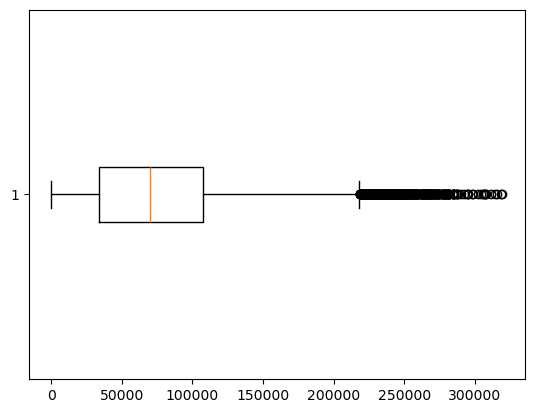

In [10]:
plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.show()

<Axes: >

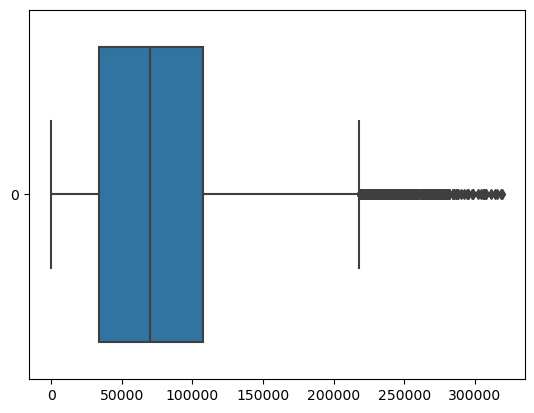

In [13]:
sns.boxplot(visa_df.prevailing_wage, orient='h')

<Axes: >

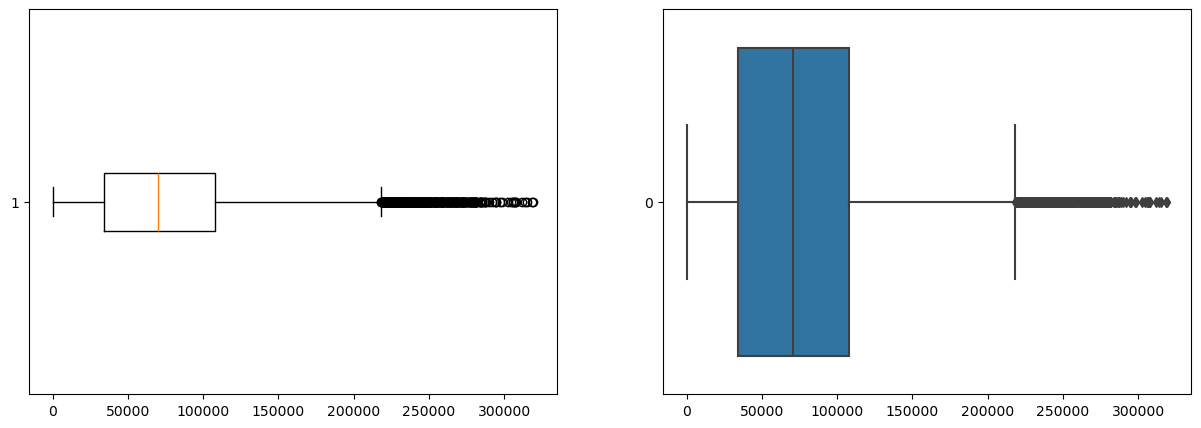

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'], vert=False)

plt.subplot(1,2,2)
sns.boxplot(visa_df.prevailing_wage, orient='h')

**Outlier Analysis**

- outliers are available less than q1-1.5*IQR

- outliers are available greater than q1+1.5*IQR

- step 1:
     - calculate q1
     - calculatw q3
     - calculate IQR = q3-q1
 
- step 2:
     - LB = q1-1.5*IQR
     - UB = q3+1.5*IQR

- step 3:
     - cond1 = visa_df['prevailing_wage'] < LB
     - cond1 = visa_df['prevailing_wage'] < UB
     - apply OR operator to get outliers


In [23]:
q1 = round(np.percentile(visa_df['prevailing_wage'], 25),2)
q3 = round(np.percentile(visa_df['prevailing_wage'], 75),2)
IQR = q3-q1
LB = q1-1.5*IQR
UB = q3+1.5*IQR
cond1 = visa_df['prevailing_wage'] < LB
cond2 = visa_df['prevailing_wage'] > UB
outlier_data = visa_df[cond1 | cond2]
len(outlier_data)

427

In [25]:
cond1 = visa_df['prevailing_wage'] > LB
cond2 = visa_df['prevailing_wage'] < UB
non_outlier_data = visa_df[cond1 & cond2]

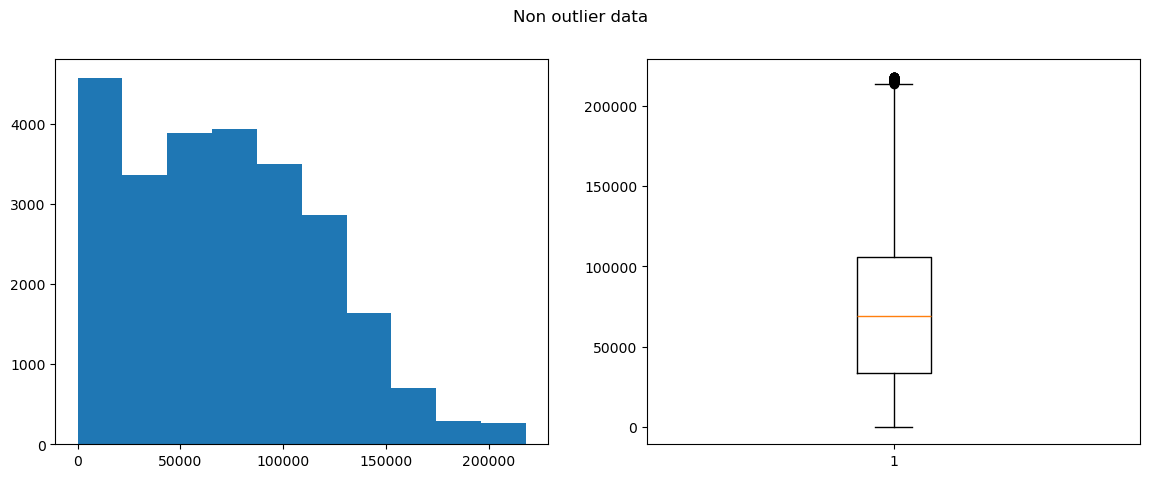

In [27]:
plt.figure(figsize=(14,5))
plt.suptitle("Non outlier data")
plt.subplot(1,2,1).hist(non_outlier_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outlier_data['prevailing_wage'])
plt.show()

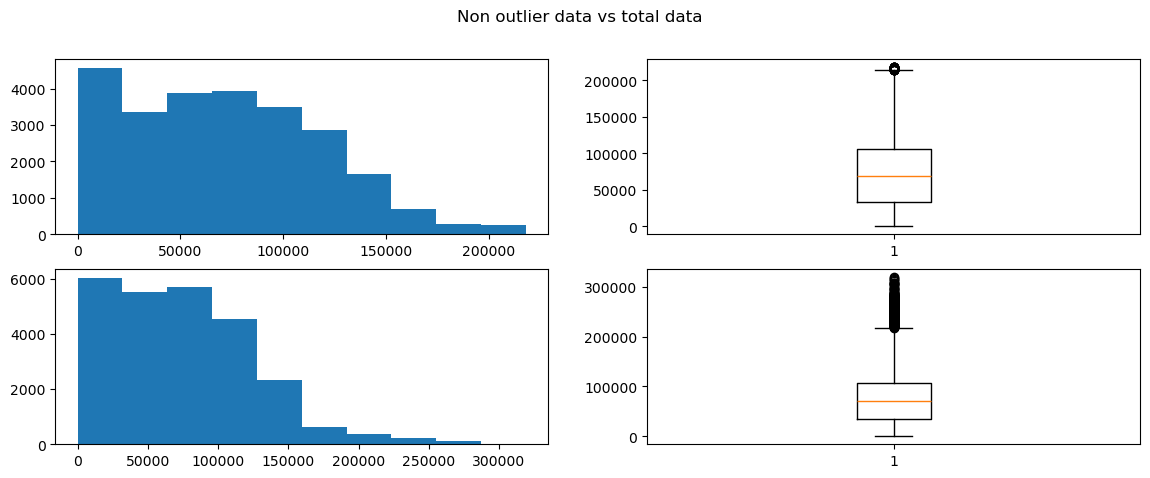

In [30]:
plt.figure(figsize=(14,5))
plt.suptitle("Non outlier data vs total data")
plt.subplot(2,2,1).hist(non_outlier_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outlier_data['prevailing_wage'])

plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])
plt.show()

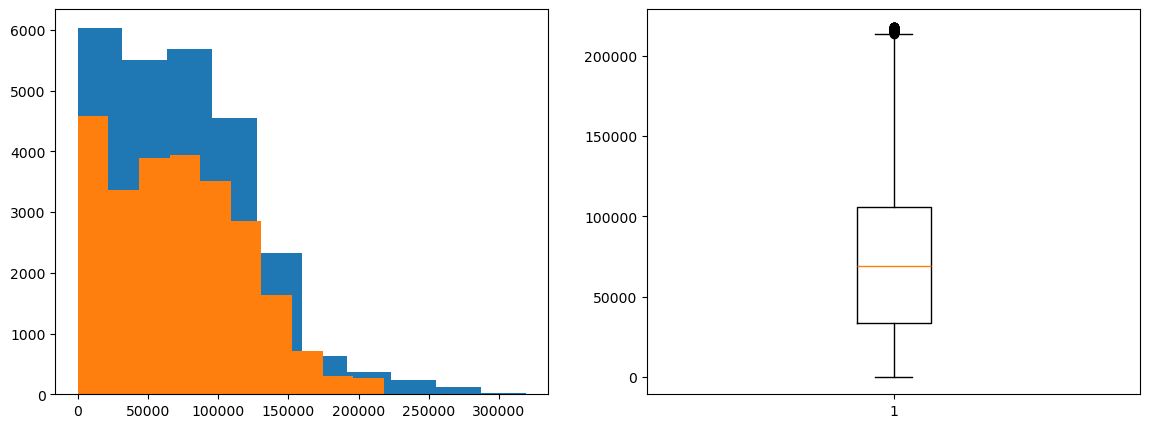

In [31]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outlier_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outlier_data['prevailing_wage'])
plt.show()

**How to deal with outliers**

**Method-1: Drop the outliers**

   - Drop the outliers is not a good idea
   - whe we drop the outlier, data will be lost


**Method-2: Fill with median value**

   - we already know that outlier does not affect the median
   - so we will fill the outlier with median

**Method-3: Cap the values with Q1 Q3**

   - all lessthan lowerbound values, we can replace with q1 or LB
   - all greaterthan upperbound values, we can replace with q3 or UB

**Fill with median**

steps:

- create a empty list
- calculate median visa_df['prevailing_wage'].median
- iterate the visa_df['prevailing_wage'].values
- if each value is 

In [55]:
lst = []

median = visa_df['prevailing_wage'].median()
q1 = round(np.percentile(visa_df['prevailing_wage'],25),2)
q3 = round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR = q3-q1
LB = q1-1.5*IQR
UB = q3+1.5*IQR

for i in visa_df['prevailing_wage'].values:
    if i < LB or i > UB:
        lst.append(median)
    else:
        lst.append(i)

vdf = visa_df.copy()
vdf['prevailing_wage'] = lst

In [44]:
vdf[vdf['prevailing_wage'] == 70308.20999999999]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,70308.21,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,70308.21,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,70308.21,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,70308.21,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,70308.21,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.21,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.21,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.21,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.21,Year,N,Certified


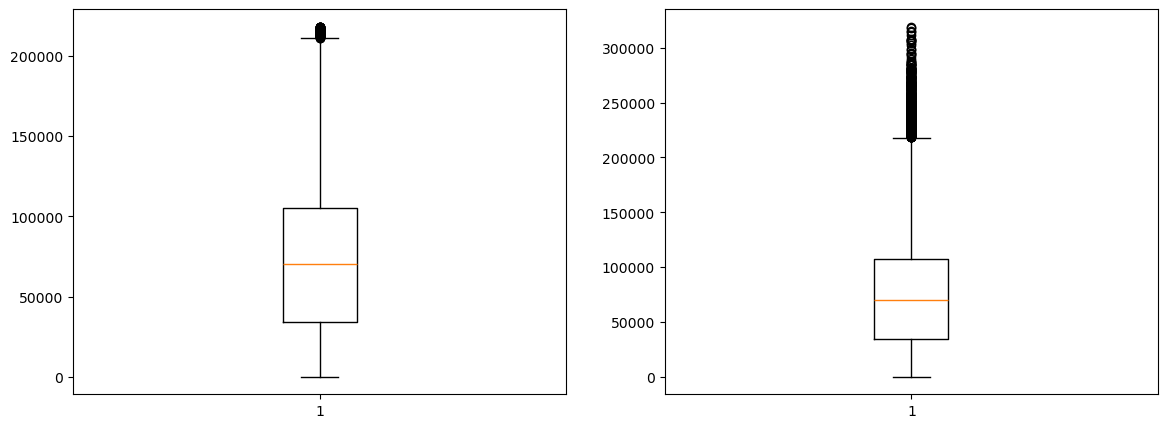

In [50]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).boxplot(vdf['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

In [42]:
median

70308.20999999999

**np.where**

- np.where is use for binary condition

- it has 3 arguments

  - condition
 
  - value, if condition is True
 
  - value, if condition is False

In [51]:
d = {"sub": ["DS","ML","NLP"],
    "Marks": [100,150,20]}
data = pd.DataFrame(d)

In [52]:
data

,sub,Marks
0,DS,100
1,ML,150
2,NLP,20


In [56]:
# Task if marks > 100 replace with 1

cond = data['Marks'] > 100
l = np.where(cond , 1, data['Marks'])

In [57]:
l

array([100,   1,  20], dtype=int64)

In [60]:
median = visa_df['prevailing_wage'].median()
q1 = round(np.percentile(visa_df['prevailing_wage'],25),2)
q3 = round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR = q3-q1
LB = q1-1.5*IQR
UB = q3+1.5*IQR

cond1 = visa_df['prevailing_wage'] < LB
cond2 = visa_df['prevailing_wage'] > UB
con = cond1 | cond2
l = np.where(con, median, visa_df['prevailing_wage'])
vdf = visa_df.copy()
vdf['prevailing_wage'] = l

In [61]:
vdf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
